In [30]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)

mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset

data_df = pd.merge(mouse_drug_data,clinical_trial_data, how ="outer", on ="Mouse ID")




# Display the data table for preview

data_df.head()








,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = data_df.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame

tumor_df = pd.DataFrame(tumor_mean)

tumor_df = tumor_df.drop(columns=["Metastatic Sites"])



# Preview DataFrame
tumor_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [32]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_sem = data_df.groupby(["Drug", "Timepoint"]).sem()
tumor_mean_sem = pd.DataFrame(tumor_sem)


# Convert to DataFrame

tumor_mean_sem = tumor_mean_sem.drop(columns=["Metastatic Sites","Mouse ID"])

# Preview DataFrame

tumor_mean_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [33]:
# Minor Data Munging to Re-Format the Data Frames
new_sem =tumor_mean_sem .pivot_table(index='Timepoint', columns='Drug',values='Tumor Volume (mm3)')


# Preview that Reformatting worked
new_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [34]:
# Minor Data Munging to Re-Format the Data Frames
new_dataframe = tumor_df.pivot_table(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")


# Preview that Reformatting worked
new_dataframe.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


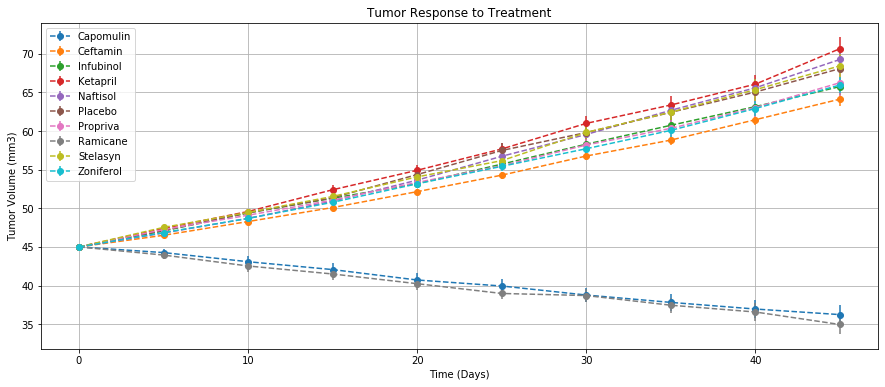

In [35]:
# Generate the Plot (with Error Bars)

plt.figure(figsize=(15,6))
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()


drug_index = new_dataframe.columns

for drug in drug_index:
    plot_drug = plt.errorbar(new_dataframe.index, new_dataframe[drug], new_sem[drug], fmt='o', linestyle='--', label=drug)
    plt.legend(loc='best')
    if drug == drug_index[-1]:
        plt.savefig("TumorResponse_vs_Timepoint.png")
plt.show()







In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
met_site = data_df.groupby(["Drug","Timepoint"]).mean()

# met_site = met_site.drop(columns=["Tumor Volume (mm3)"])

# Convert to DataFrame
met_site = pd.DataFrame(tumor_mean)

# Preview DataFrame
met_site.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [36]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_sem = data_df.groupby(["Drug", "Timepoint"]).sem()
met_mean_sem = pd.DataFrame(met_sem)

# Convert to DataFrame
met_mean_sem = met_mean_sem.drop(columns=["Tumor Volume (mm3)","Mouse ID"])

# Preview DataFrame
met_mean_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metsite_sem =met_mean_sem .pivot_table(index='Timepoint', columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
metsite_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [12]:
# Minor Data Munging to Re-Format the Data Frames
met_site1 =met_site .pivot_table(index='Timepoint', columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
met_site1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


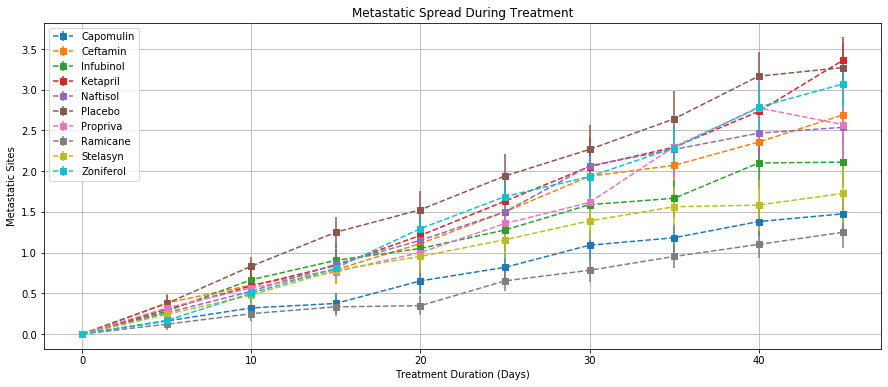

In [14]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(15,6))
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()

# creates a series by the elements of Drug by listing columns
meta_index = met_site1.columns

for drug in meta_index:
    plot_metastatic = plt.errorbar(met_site1.index, met_site1[drug], metsite_sem[drug], fmt='s', linestyle='--', label=drug)
    plt.legend(loc='best')
    if drug == meta_index[-1]:
        plt.savefig("MetaStaticSpread_vs_Timepoint.png")
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group = data_df.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
micedata = pd.DataFrame(mice_group["Mouse ID"])

# Preview DataFrame
micedata.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [16]:
# Minor Data Munging to Re-Format the Data Frames
mice_data = micedata.pivot_table(index = "Timepoint", columns = "Drug", values = "Mouse ID")

# Preview the Data Frame
mice_data.head()




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [17]:
survival_rate = (mice_data/mice_data.iloc[0]).round(0)*100
survival_rate.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
10,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
15,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
20,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [18]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

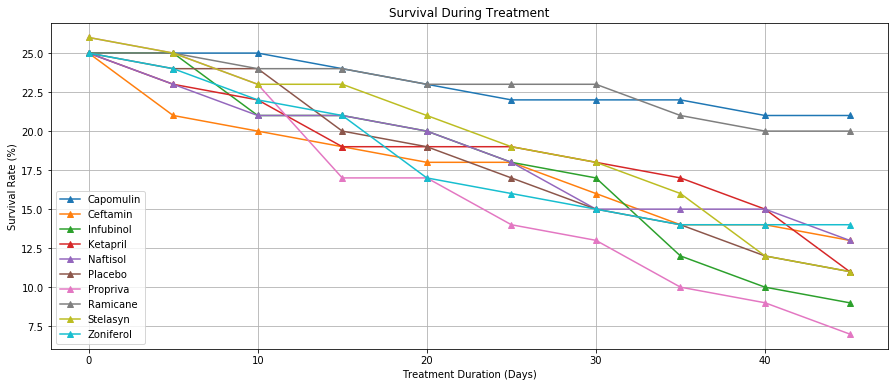

In [19]:
survivalrate_index =survival_rate.columns
plt.figure(figsize=(15,6))
plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

for drug in survivalrate_index:
    plot_drugsurvivalrate=plt.plot(survival_rate.index, mice_data[drug], linestyle='-', marker='^', label= drug)
    plt.legend(loc='best')
    if drug == survivalrate_index[-1]:
        plt.savefig("SurvivalRate_vs_Timepoint.png")
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
percent_change = ((new_dataframe.iloc[-1]-new_dataframe.iloc[0])/new_dataframe.iloc[0])*100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [21]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 



# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
# fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [22]:
# Store all Relevant Percent Changes into a Tuple
tup = percent_change.tolist()
tup



[-19.475302667894173,
 42.51649185589744,
 46.12347172785187,
 57.028794686606076,
 53.92334713476923,
 51.29796048315153,
 47.24117486320637,
 -22.320900462766673,
 52.085134287899024,
 46.57975086509525]

In [38]:
drug = list(percent_change.index)
drug

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

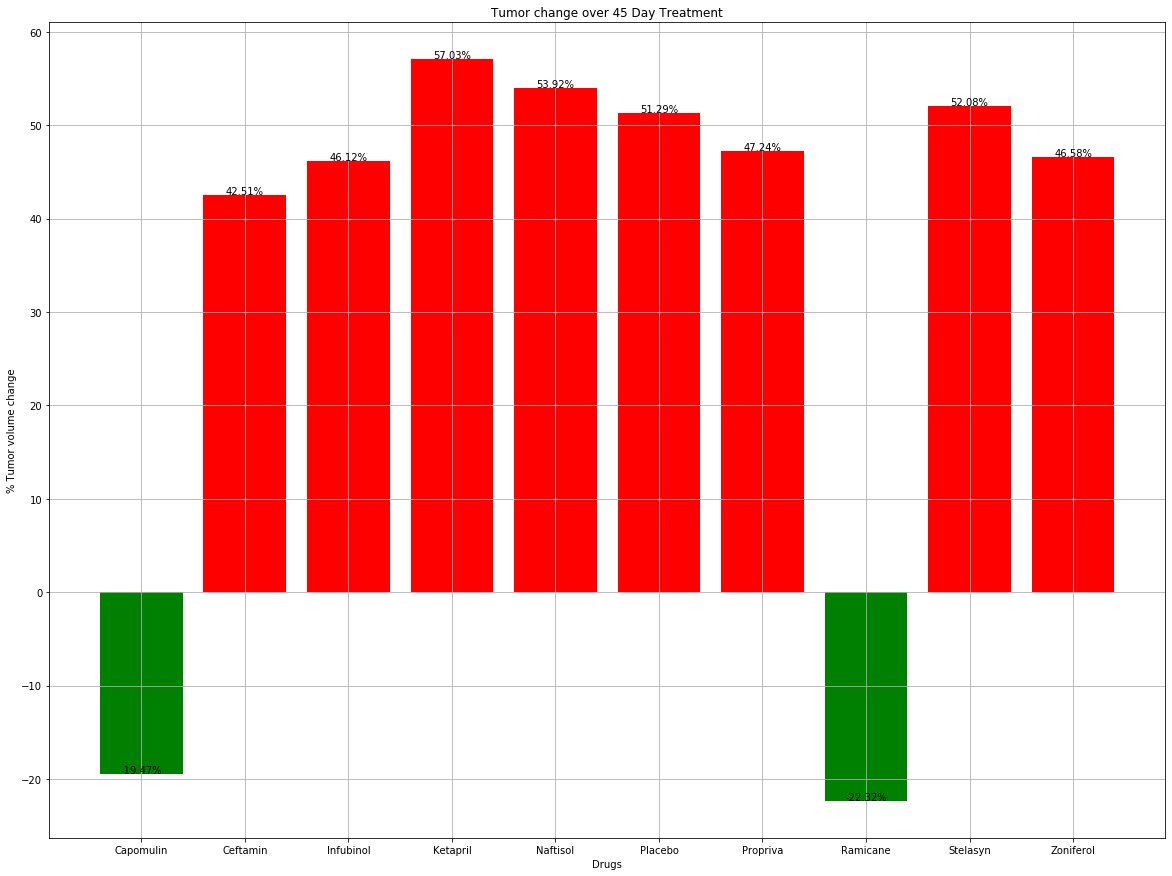

In [39]:
colors = ['r' if change > 0 else 'g' for change in tup]
colors
plt.figure(figsize=(20,15))
x_axis = np.arange(len(tup))
x_axis

plt.bar(drug, tup, color=colors,align="center")
# plt.xticks(rotation=45)
tick_locations = [value for value in x_axis]
# plt.xticks = (tick_locations, tup.index)

plt.title("Tumor change over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor volume change")
plt.grid(True)

label= ["-19.47", "42.51", "46.12", "57.03", "53.92", "51.29",
        "47.24", "-22.32", "52.08", "46.58"]
for i in range(len(drug)): 
    
    plt.text(x = drug[i], y = tup[i]+0.1, s = label[i]+"%", size = 10, horizontalalignment= "center", verticalalignment="baseline")

plt.show
plt.savefig("Tumorchange_45days.png")